<a href="https://colab.research.google.com/github/aurimas13/CodeAcademy-AI-Course/blob/main/Projects/Project_2_or_how_capstone_should_look_like_fill_in.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <b> Installations </b>

Using the `pmdarima` packages for time series forecasting. To install these packages, run the following commands:



In [ ]:
!pip install pmdarima
!pip install pickle5

# <b> Imports </b>

Importing several libraries and packages to perform time series forecasting and data analysis. 

In [ ]:
import warnings
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import random
import requests
import pickle
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Disable warnings and set logger level
warnings.filterwarnings("ignore")
logging.getLogger("cmdstanpy").setLevel(logging.WARNING)

# Set the default figure size
plt.rcParams['figure.figsize'] = (20, 12)


# <b> Loading data </b>

Loading two separate datasets of Revenue and Weather from an Excel file hosted on GitHub.

In [ ]:
url = "https://github.com/aurimas13/CodeAcademy-AI-Course/blob/main/Datasets/Revenue_Prognosis.xlsx?raw=True"
revenue_data = pd.read_excel(url, sheet_name='Revenue', parse_dates=['Date'], engine='openpyxl')
weather_data = pd.read_excel(url, sheet_name='Weather', parse_dates=['dt'], engine='openpyxl')

# <b> Exploratory Data Analysis </b>

1. Display the first few rows of the datasets:

In [ ]:
print("Revenue Data:")
print(revenue_data.head())
print("\nWeather Data:")
print(weather_data.head())

Revenue Data:
        Date     Revenue
0 2018-01-01        0.00
1 2018-01-02        0.00
2 2018-01-03  3087464.68
3 2018-01-04  2770763.36
4 2018-01-05        0.00

Weather Data:
       time  temperature  dew_point  humidity wind  wind_speed  pressure  \
0  00:20:00            0          0       1.0    S          11       982   
1  00:50:00            0          0       1.0    S          14       983   
2  01:20:00            0          0       1.0    S          11       982   
3  01:50:00            0          0       1.0    S          14       982   
4  02:20:00            0          0       1.0    S          14       981   

   precipitation      condition         dt  
0              0           Mist 2018-01-01  
1              0           Mist 2018-01-01  
2              0           Mist 2018-01-01  
3              0  Mostly Cloudy 2018-01-01  
4              0     Light Rain 2018-01-01  


2. Examine the dataset shape, column types, and missing values:

In [ ]:
print("Revenue Data Info:")
print(revenue_data.info())
print("\nWeather Data Info:")
print(weather_data.info())


Revenue Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1749 non-null   datetime64[ns]
 1   Revenue  1749 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.5 KB
None

Weather Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86990 entries, 0 to 86989
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           86990 non-null  object        
 1   temperature    86990 non-null  int64         
 2   dew_point      86990 non-null  int64         
 3   humidity       86990 non-null  float64       
 4   wind           86990 non-null  object        
 5   wind_speed     86990 non-null  int64         
 6   pressure       86990 non-null  int64         
 7   precipitation  86990 non-null  int64 

3. Calculate and display summary statistics:


In [ ]:
print("Revenue Data Summary Statistics:")
print(revenue_data.describe())
print("\nWeather Data Summary Statistics:")
print(weather_data.describe())

Revenue Data Summary Statistics:
            Revenue
count  1.749000e+03
mean   6.376979e+08
std    2.644243e+10
min    0.000000e+00
25%    3.269451e+06
50%    5.059526e+06
75%    7.218968e+06
max    1.105855e+12

Weather Data Summary Statistics:
        temperature     dew_point      humidity    wind_speed      pressure  \
count  86990.000000  86990.000000  86990.000000  86990.000000  86990.000000   
mean       7.880251      3.722911      0.779709     13.511185    992.038694   
std        9.178441      7.727982      0.192704      7.444308      9.052114   
min     -237.000000    -25.000000      0.150000      0.000000    952.000000   
25%        1.000000     -1.000000      0.650000      9.000000    987.000000   
50%        7.000000      3.000000      0.850000     12.000000    993.000000   
75%       15.000000     10.000000      0.930000     19.000000    998.000000   
max      340.000000     22.000000      1.000000     49.000000   1024.000000   

       precipitation  
count        86990

4. Calculate the number of zero values in each column:


In [ ]:
print("Zero values in Revenue Data:")
print((revenue_data == 0).sum())
print("\nZero values in Weather Data:")
print((weather_data == 0).sum())

Zero values in Revenue Data:
Date       0
Revenue    5
dtype: int64

Zero values in Weather Data:
time                 0
temperature       4461
dew_point         5312
humidity             0
wind                 0
wind_speed         365
pressure             0
precipitation    86990
condition            0
dt                   0
dtype: int64


5. Plot the correlation heatmap for both datasets:


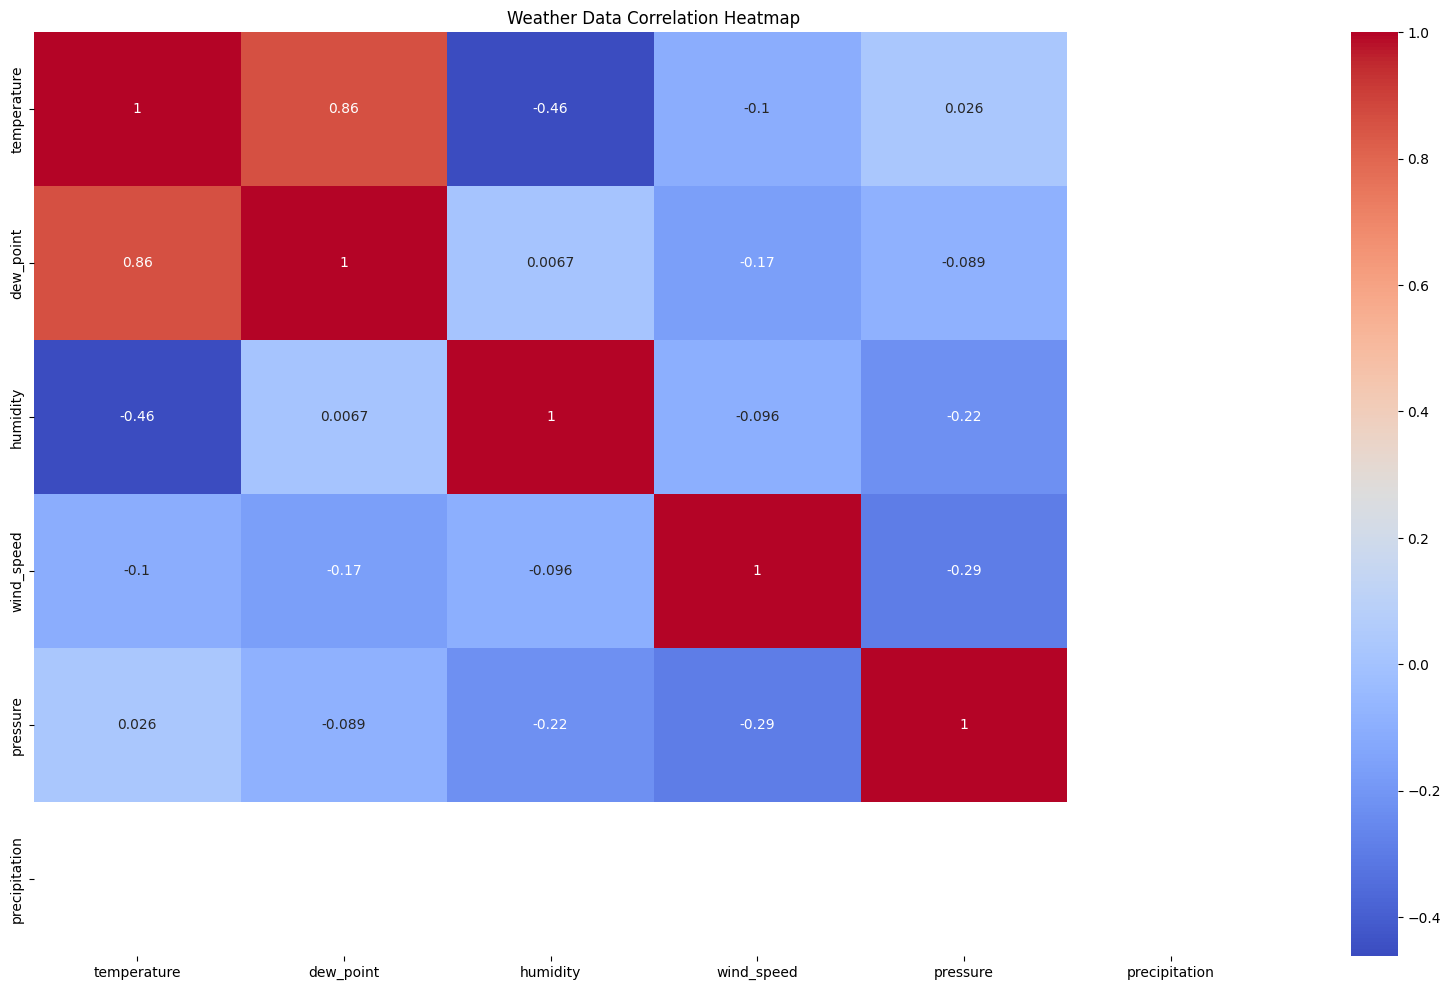

In [ ]:
sns.heatmap(weather_data.corr(), annot=True, cmap='coolwarm')
plt.title("Weather Data Correlation Heatmap")
plt.show()


6. Identify and plot outliers in the revenue_data dataset using box plots:


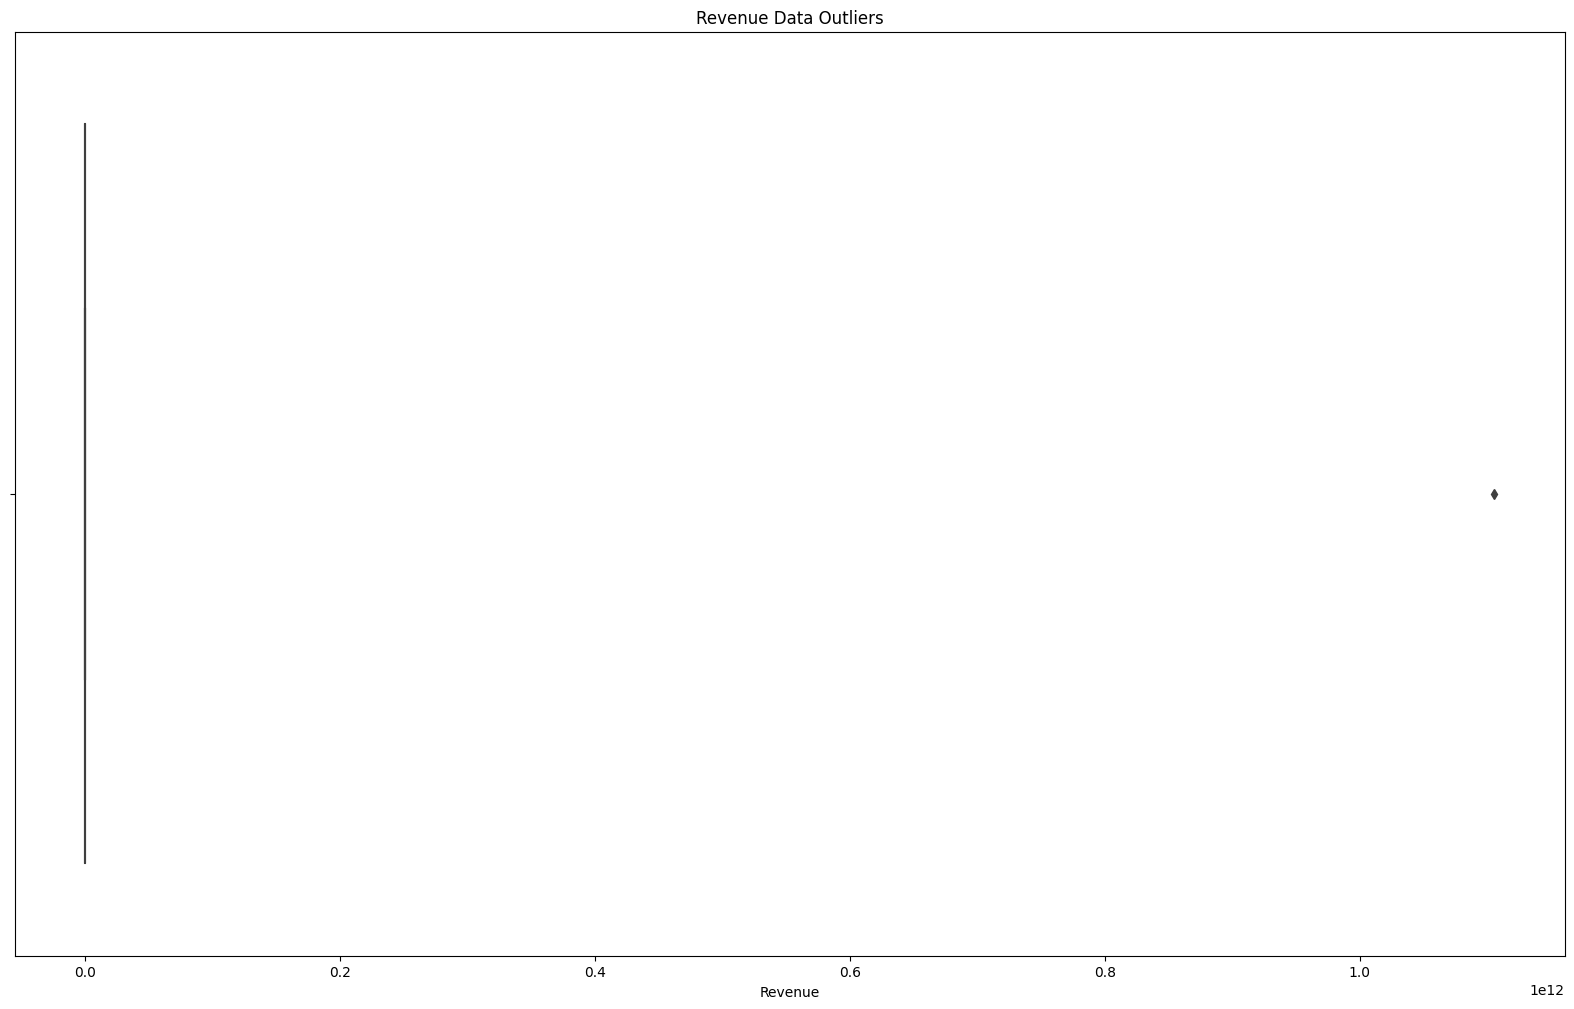

In [ ]:
sns.boxplot(x=revenue_data['Revenue'])
plt.title("Revenue Data Outliers")
plt.show()


7. Identify the most common values for categorical features (if any) in both datasets:



In [ ]:
# Example for a categorical column 'category_column' in weather_data
print("Most common values in 'wind' and 'condition' features:")
print(weather_data['wind'].value_counts())
print(weather_data['condition'].value_counts())

Most common values in 'wind' and 'condition' features:
S       12894
W        7355
SSE      6390
SSW      6271
VAR      6061
N        5472
NNW      4983
NW       4626
WSW      4542
SW       4457
WNW      4382
SE       4320
E        3567
NNE      3211
ESE      2998
NE       2759
ENE      2337
CALM      365
Name: wind, dtype: int64
Fair                           32250
Mostly Cloudy                  16223
Cloudy                         10111
Mist                            5149
Light Rain                      3375
Light Snow                      3191
Partly Cloudy                   2952
Fog                             2418
Light Rain Shower               2369
Wintry Mix                      1990
Showers in the Vicinity         1582
Snow                            1079
Light Drizzle                    928
Shallow Fog                      523
Light Snow Shower                478
Fair / Windy                     254
Mostly Cloudy / Windy            239
T-Storm                          226
Ra

# <b> Data Preprocessing </b>

1. The 'time' column is removed from the weather_data dataset as it is not required for the analysis.
2. Categorical features 'wind' and 'condition' in weather_data are converted to numerical values using categorical encoding, making them suitable for machine learning algorithms.
3. `revenue_data` is resampled to the monthly level to align with the desired forecasting frequency. The 'Date' column is set as the index, and the data is aggregated using the sum of revenue for each month.
4. `weather_data` is also aggregated to the monthly level using appropriate aggregation functions for each feature, such as mean for continuous variables and median for categorical variables.
5. The revenue_data and weather_data datasets are merged on the 'Date' and 'dt' columns, creating a single dataset with monthly revenue and weather information.
6. The redundant 'dt' column is dropped from the merged dataset, as it duplicates the 'Date' column.
7. A new 'lagged_revenue' column is added to the merged dataset, representing the revenue of the previous month. This can be useful as a predictor for the current month's revenue.
8. Zero values in the dataset are replaced with NaNs to better handle missing or erroneous data.
9. The 'precipitation' column is dropped from the dataset due to a large number of NaN values.
10. Any remaining rows with NaN values are removed from the dataset.
11. The data is filtered to only include rows with Revenue less than or equal to 10^9, removing potential outliers.

After these preprocessing steps, the data is cleaned, transformed, and ready for further analysis and modeling.


In [ ]:
# Drop the 'time' column from the weather_data
weather_data = weather_data.drop('time', axis=1)

# Convert categorical features 'wind' and 'condition' to numerical values
wind_categories = weather_data['wind'].astype('category').cat.categories
condition_categories = weather_data['condition'].astype('category').cat.categories

weather_data['wind'] = weather_data['wind'].astype('category').cat.codes
weather_data['condition'] = weather_data['condition'].astype('category').cat.codes

# Reseample revenue_data
revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
revenue_data.set_index('Date', inplace=True)
monthly_revenue_data = revenue_data.resample('M').sum().reset_index()

# Aggregate weather_data on 'dt' to monthly level
monthly_weather_data = weather_data.resample('M', on='dt').agg({
    'temperature': 'mean',
    'dew_point': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',
    'pressure': 'mean',
    'precipitation': 'sum',
    'wind': 'median',
    'condition': 'median'
}).reset_index()


In [ ]:
# Merge revenue_data and monthly_weather_data on the Date and dt columns
merged_data = pd.merge(monthly_revenue_data, monthly_weather_data, left_on='Date', right_on='dt', how='inner')

# Drop the 'dt' column since it's a duplicate of 'Date'
merged_data.drop(columns=['dt'], inplace=True)

# Add the lagged revenue column to the merged_data
merged_data['lagged_revenue'] = merged_data['Revenue'].shift(1).fillna(0)

# Replace zeros with NaNs
merged_data = merged_data.replace(0, np.nan)

# Drop column 'precipitation' with NaNs values
merged_data = merged_data.drop('precipitation', axis=1)

# Drop rows with NaN values
merged_data = merged_data.dropna()

# Filter rows that have Revenue less than or equal to 10^9
merged_data = merged_data[merged_data['Revenue'] <= 10**9]

# <b> Splitting Data </b>

1. The merged dataset is split into train and test sets based on a predefined date (January 1, 2022). All data before this date is assigned to the training set, and all data on or after this date is assigned to the test set. This temporal split ensures that the model is trained on historical data and tested on more recent, unseen data.
2. The feature matrix (X) and target vector (y) are separated for both the train and test sets. The 'Date' and 'Revenue' columns are removed from the feature matrix, as 'Date' is not used as a predictor and 'Revenue' is the target variable we aim to predict. The target vector contains only the 'Revenue' column.

After these steps, you have four datasets ready for model training and evaluation: `X_train`, `y_train`, `X_test`, and `y_test`.

In [ ]:
# Split the data into train and test sets
train_data = merged_data[merged_data['Date'] < '2022-01-01']
test_data = merged_data[merged_data['Date'] >= '2022-01-01']

# Separate the features (X) and the target (y)
X_train = train_data.drop(columns=['Date', 'Revenue'])
y_train = train_data['Revenue']
X_test = test_data.drop(columns=['Date', 'Revenue'])
y_test = test_data['Revenue']

# <b> Scaling Data </b>

The process of scaling the feature data for both training and testing sets. A StandardScaler instance is used to transform the feature data (X_train and X_test) by fitting on the training data and applying the same scaling to the test data. The scaled features are then converted back to DataFrames with the same column names. Additionally, a separate StandardScaler instance is created for the target variable y (y_train) to scale the target values. This preprocessing step helps to standardize the data and improve the performance of machine learning models.

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled features back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Initialize a StandardScaler instance for the target variable y
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy(dtype='float32').reshape(-1, 1))

# <b> Device Check </b>

Check if GPU is available and set the device accordingly.

In [ ]:
# Checking deivice to run on
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# <b> MAPE & RMSE Metrics </b>

Maunually defining MAPE & RMSE Metrics for a better accuracy response on them.

In [ ]:
# Definining the MAPE metric as a MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100


In [ ]:
# Define RMSE metric as RMSE function
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# <b> 1<sup>st</sup> model - LSTM </b>

1. An LSTM model class is defined, which inherits from PyTorch's `nn.Module`. The class initializes the LSTM layers and a linear output layer.

2. Hyperparameters, such as input size, hidden size, number of layers, output size, number of epochs, learning rate, and batch size, are defined for the LSTM model.

3. The training and target data are converted from DataFrames to NumPy arrays and then to PyTorch tensors. A DataLoader is created with a TensorDataset and batch size.

4. The LSTM model is initialized, and a Mean Squared Error (MSE) loss function and an Adam optimizer are defined.

5. The model is trained by iterating through the epochs and updating the model parameters using the optimizer and the calculated loss from the outputs and targets.

6. The model is evaluated on the test data, and the predictions are converted back to their original scale using the target variable scaler (y_scaler).

7. The mean squared error (MSE), mean absolute error (MAE), and mean absolute percentage error (MAPE) are calculated and printed, providing an assessment of the LSTM model's performance on the test data.

## *Neural Net Architecture*

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Adding sequence_length dimension
        x = x.unsqueeze(1)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

## *Hyperparameters*



In [ ]:
# Define Hyperparameters
input_size = X_train_scaled.shape[1]
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 100
learning_rate = 0.001
batch_size = 32

## *Conversion*

In [ ]:
# Convert DataFrames to NumPy arrays and then to PyTorch tensors
X_train_numpy = X_train_scaled.to_numpy(dtype='float32')
y_train_numpy = y_train.to_numpy(dtype='float32').reshape(-1, 1)
X_train_tensor = torch.tensor(X_train_numpy)
y_train_tensor = torch.tensor(y_train_scaled)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


## *Initialize Net & Define Loss with Optimizer*

In [ ]:
# Initialize Net
model = LSTM(input_size, hidden_size, num_layers, output_size).to(device)

# Define Loss with Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## *Training and Testing*

In [ ]:
# Train and Test
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(device).float()
        targets = targets.to(device).float()

        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = outputs.view(-1, 1)  # Reshape the output tensor
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.6710
Epoch [20/100], Loss: 0.7733
Epoch [30/100], Loss: 1.2498
Epoch [40/100], Loss: 0.7997
Epoch [50/100], Loss: 0.7643
Epoch [60/100], Loss: 0.5219
Epoch [70/100], Loss: 0.6520
Epoch [80/100], Loss: 0.6159
Epoch [90/100], Loss: 0.8420
Epoch [100/100], Loss: 0.9678


## *Evaluation*

In [ ]:
# 1. Evaluate model

# 2. Convert to numpy then to torch tensor

# 3. Get predictions 

# Metrics (Hint given)
mse = mean_squared_error(y_test, y_pred_unscaled)
mae = mean_absolute_error(y_test, y_pred_unscaled)
mape = mean_absolute_percentage_error(y_test, y_pred_unscaled)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 7634006191722418.00
Mean Absolute Error: 76780536.96
Mean Absolute Percentage Error: 36.13145875991508


# <b> 2<sup>nd</sup> model - ARIMA </b>

## *Prepare Data*

In [ ]:
# Prepare the time series data for the ARIMA model
ts_data = train_data[['Date', 'Revenue']]
ts_data.set_index('Date', inplace=True)

## *Fitting*

In [ ]:
# Fit the ARIMA model

# *Prediction*

In [ ]:
# Get the forecast for the next months


## *Evaluation*

In [9]:
# Prepare the test data for evaluation

# Calculate the errors
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)

# <b> Comparing 2 models </b>


In [1]:
# True revenue values


# LSTM predictions


# ARIMA predictions


# Plot the true revenue values and the predictions from each model


# <b> Summary of Model Performances </b>



In [2]:
# Calculate the errors

# Randomly select an index from the test set

# Get the true revenue value

# Get the corresponding input values for the selected index

# LSTM prediction

# ARIMA prediction

# Compare the true value and the predictions from all models
print(f"True revenue value: {true_revenue_value:.2f}")
print(f"LSTM prediction: {lstm_prediction:.2f}")
print(f"ARIMA prediction: {arima_prediction:.2f}")

In [ ]:
# True revenue values

# Model predictions

# Calculate the errors


In [3]:
# Print the metrics
print("ARIMA Model Performance:")
print("Mean Squared Error:", mse_arima)
print("Mean Absolute Error:", mae_arima)
print("Mean Absolute Percentage Error:", mape_arima)
print("Root Mean Square Error:", arima_rmse)

print("\nLSTM Model Performance:")
print("Mean Squared Error:", mse_lstm)
print("Mean Absolute Error:", mae_lstm)
print("Mean Absolute Percentage Error:", mape_lstm)
print("Root Mean Square Error:", lstm_rmse)

# Summary of Model Performance
print("\nModel Performance Summary:")
print(f"ARIMA:   MSE={mse_arima:.2f},   MAE={mae_arima:.2f}, MAPE={mape_arima*100:.2f}%,  RMSE={arima_rmse:.0f}")
print(f"LSTM:    MSE={mse_lstm:.2f},  MAE={mae_lstm:.2f}, MAPE={mape_lstm*100:.2f}%, RMSE={lstm_rmse:.0f}")

# <b> Tuning ARIMA model </b>


In [4]:
# Optimize ARIMA parameters: 
p, d, q = # SET THIS

arima_model = ARIMA(ts_data, order=(p, d, q))
arima_results = arima_model.fit()

# Get the forecast for the next months
num_months_to_forecast = len(test_data)
forecast = arima_results.forecast(steps=num_months_to_forecast)

# Prepare the test data for evaluation
y_true = test_data['Revenue'].values
y_pred = forecast.values

# Calculate the errors
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

# Print the errors
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)

# <b> Comparing tuned model </b>

In [5]:
# # True revenue values
true_revenue_dates = test_data['Date']
true_revenue = test_data['Revenue']

# ARIMA predictions
arima_dates = test_data['Date']
arima_pred = forecast.values

# Plot the true revenue values and the predictions from each model
plt.figure(figsize=(12, 6))
plt.plot(true_revenue_dates, true_revenue, label="True Revenue", marker='o', linestyle='-')
plt.plot(arima_dates, arima_pred, label="ARIMA Predictions", marker='d', linestyle='-.')

plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Revenue Predictions Comparison: True value vs. ARIMA")
plt.legend()
plt.show()

In [6]:
# Randomly select an index from the test set
random_index = random.randint(0, len(y_test) - 1)

# Get the true revenue value
true_revenue_value = y_test.iloc[random_index]

# ARIMA prediction
arima_prediction = arima_pred[random_index]

# Compare the true value and the predictions from all models
print(f"True revenue value: {true_revenue_value:.2f}")
print(f"ARIMA prediction: {arima_prediction:.2f}")

# <b> Conclusion </b>


In [7]:
# Conclusion
print("\nBased on the Mean Absolute Percentage Error (MAPE), the best model for monthly revenue forecasting is:")
best_model = min([('ARIMA', mape), ('LSTM', mape_lstm)], key=lambda x: x[1])
print(f"{best_model[0]} with MAPE = {best_model[1]:.2f}%")


# <b> Save the model </b>

In [8]:
# Save the trained model to a file
